# $\color{ForestGreen}{\text{California Housing Dataset}}$

In here, we consider a more realistic example where we apply regularization. The following dataset contains the housing data of the state of California.

In [1]:
# Loading California housing dataset

from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [2]:
# Finding the description of the involved variables

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# Defining a dataframe for the California housing dataset

import numpy as np
import pandas as pd

ca_df = pd.DataFrame(california_housing.data)       # Defining dataframe ca_df 
ca_df.columns = california_housing.feature_names    # Defining the headers of the dataframe
ca_df['Price'] = california_housing.target          # Adding Price column

In [4]:
ca_df.shape   # Shape of 'ca_df'

(20640, 9)

In [5]:
ca_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


This time, we do not perform a correlation analysis. Instead, we use regularized regression. In particular, we use Lasso regression as a feature selection method.

In [6]:
# Defining the features and the target of the model

features = ca_df.columns[:-1]      # Feature names 
target = ca_df.columns[-1]         # Target name

X = ca_df[features].values         # Features
y = ca_df[target].values           # Target 

In [7]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## $\color{ForestGreen}{\text{Linear Regression without Regularization}}$

In [8]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression  

reg = LinearRegression()         # Instantiate linear regression
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train data

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.6097 

Coefficients of Linear Model: [ 4.53053771e-01  1.01139824e-02 -1.30682277e-01  8.47640845e-01
 -3.48804147e-06 -3.35207458e-03 -4.23235312e-01 -4.37132608e-01] 

Intercept: -37.3622661064085


In [9]:
# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)

# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for train

print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for test dataset =  0.591 



## $\color{ForestGreen}{\text{Lasso Regression as a Feature Selection Method}}$

In [10]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import Lasso  

penalty_factor = [0.0001, 0.0002, 0.0004, 0.0005, 0.001, 0.01]

for a in penalty_factor:
    lasso = Lasso(alpha=a, max_iter=10e5, normalize=True, tol=1e-4)   # Instantiate lasso regression
    lasso.fit(X_train, y_train)        # Fit the train data

    r2_train_score = lasso.score(X_train, y_train)   # Calculating R^2 score for train dataset
    y_pred = reg.predict(X_test)       # Finding predictions of the model for test dataset
    r2_test_score = reg.score(X_test, y_test)        # Calculating R^2 score for test dataset

    print('Penalty Factor:', a)
    print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
    print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')
    print('Coefficients of Linear Model:', lasso.coef_, '\n')
    print('Intercept:', lasso.intercept_, '\n******************************')

Penalty Factor: 0.0001
R^2 score for train dataset =  0.6038 

R^2 score for test dataset =  0.591 

Coefficients of Linear Model: [ 0.41899438  0.01062602 -0.0643584   0.47283896 -0.         -0.00237304
 -0.36287832 -0.36864814] 

Intercept: -31.16400615808835 
******************************
Penalty Factor: 0.0002
R^2 score for train dataset =  0.5866 

R^2 score for test dataset =  0.591 

Coefficients of Linear Model: [ 0.38581058  0.01102402 -0.          0.10660339 -0.         -0.00137014
 -0.30254781 -0.30014893] 

Intercept: -24.95696456533762 
******************************
Penalty Factor: 0.0004
R^2 score for train dataset =  0.5464 

R^2 score for test dataset =  0.591 

Coefficients of Linear Model: [ 0.3890422   0.01152146 -0.          0.         -0.         -0.
 -0.13680877 -0.12416842] 

Intercept: -9.734187700554518 
******************************
Penalty Factor: 0.0005
R^2 score for train dataset =  0.5206 

R^2 score for test dataset =  0.591 

Coefficients of Linear Mo

### $\color{ForestGreen}{\text{Comparing the Regularization Method and Correlation Results}}$

In here, it would be appropriate to compare the results of the Lasso regression on feature selection with those of the Pearson correlation.

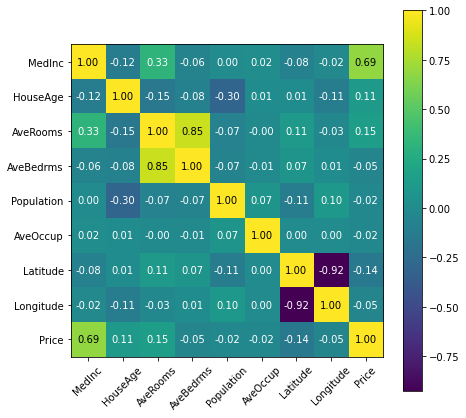

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
import mlxtend
from mlxtend.plotting import heatmap

cols = ca_df.columns     # List of colmuns of dataframe ca_df

cm = np.corrcoef(ca_df[cols].values.T)     # Calculate Pearson correlation
hm = heatmap(cm, figsize=(7,7), row_names=cols, column_names=cols)  # Represent correlation by a heat map
plt.show()

There are a couple of comments in order:

- $\textsf{MedInc}$ is by far the most significant feature for the target $\textsf{Price}$.


- The rest of the feature have little correlation with $\textsf{Price}$. The next most significant feature is $\textsf{AveRooms}$. Note that $\textsf{AveRooms}$ and $\textsf{AveBedrms}$ are *highly correlated*! Therefore, one should not consider both features independently. The same holds for $\textsf{Latitude}$ and $\textsf{Longitude}$ features.


- It should be noted that although Lasso regression works with a different mechanism, it gives $\textsf{MedInc}$ the greatest weight. 


- Lasso regularization (with appropriate penalty factor) sets the weights of $4$ features *exactly zero*. The rest of the nonzero weights (other than $\textsf{MedInc}$) are small weights which shows that these features are relatively insignificant.

As is observed from above the findings of Lasso regularization are in agreement with the results of Pearson correlation analysis.